**단계 1:** numpy array를 선언하고 패키지를 import 하는 과정

In [1]:
# 행과 열로 구성된 데이터를 사용하기 위해 필요한 패키지를 import합니다.
# 본 예제에서는 pandas, matplotlib를 사용합니다.
import numpy as np

# numpy array 타입의 객체를 선언합니다.
# 이때, 해당 객체는 Y축/X축 값을 기록합니다.
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

**단계 2:** 산점도를 그려서 데이터가 어떠한 형태로 분포가 되어 있는지 확인합니다.

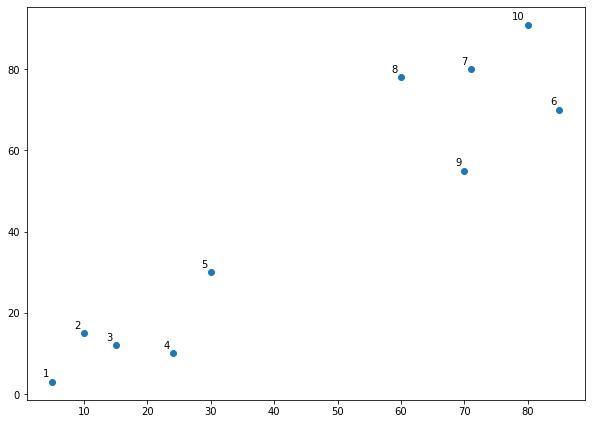

In [7]:
import matplotlib.pyplot as plt

# 산점도를 출력하기 위해 몇가지 과정을 진행합니다.
# 먼저 출력할 데이터의 갯수를 정의합니다.
# 1번부터 시작하여 10번까지의 숫자 (총 10개)를 출력합니다.
# 그래프의 크기를 지정합니다.
# 현재 배치되어 있는 subplot의 위치를 조절합니다. 
# 산점도 그릴때 X축과 Y축에 어떤 데이터를 출력할 것인지 명시합니다.
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

# zip(*iterable)은 동일한 개수로 이루어진 자료형을 묶어 주는 역할을 하는 함수입니다.
# X축, Y축, 그리고 레이블을 묶어서 처리하도록 합니다.
# 산점도 위에 레이블을 출력합니다.
# xy는 점의 위치, xytext는 문자열이 출력될 위치, ha/va는 수직/수평 방향에서의 정렬을 의미합니다.

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
    
# 그래프를 그립니다.
plt.show()

**단계 3:** scipy를 사용하여 군집화를 하고 군집화의 결과를 출력합니다.

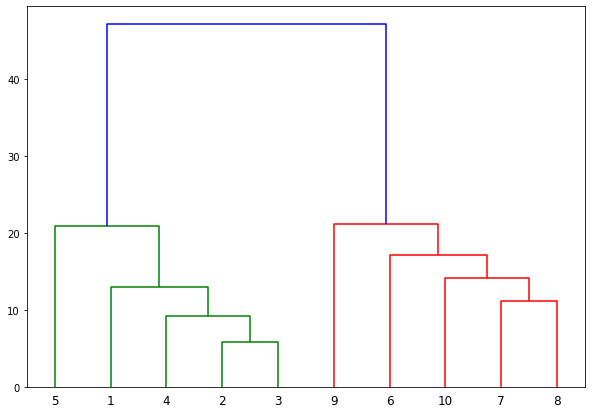

In [10]:
# 계층적 클러스터링을 하기 위해서 scipy 패키지의 linkage, dendrogram을 사용합니다.
# linkage는 계층적 클러스터를 하기 위해서, dendrogram은 클러스터링 결과를 트리 형태로 시각화하기 위해서 사용합니다.
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# 응집형의 방범중 하나인 단일연결 (Single Linkage Method)를 사용합니다.
# 이때 함수는 linkage를 사용합니다
linked =        (X, 'single')

# X축에 출력할 범위를 설정합니다.
# 이전의 예제와 동일하게 레이블은 1~10의 값을 갖습니다.
labelList = range(1, 11)

# 그래프의 크기를 지정합니다.
# dendrogram을 사용하여 트리 형태로 결과를 시각화 합니다.
# orientation: 그래프의 뿌리 방향을 결정합니다 (여기서는 최상위)
# distance_sort: 거리의 정렬 방법을 결정합니다 (오름차순/내림차순)
# show_leaf_counts: 각 클래스의 객체 숫자를 표시합니다.
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False)
plt.show()